In [1]:
import torch

In [2]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

In [3]:
x1 = torch.tensor(0.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)

In [4]:
v1 = x1**2 + 2*x2 + 1
s1 = sigmoid(v1)
s2 = 3*s1
s3 = s1
v3 = s2 + s3 + 1
y = sigmoid(v3)

In [5]:
node_dict = {"v1": v1, "s1": s1,"s2": s2,"s3": s3, "v3": v3,  }
var_dict = {"x1": x1, "x2": x2}

In [6]:
for node_name in node_dict:
    for var_name in var_dict:
        node = node_dict[node_name]
        var = var_dict[var_name]
        
        if var.grad is not None:
            var.grad.zero_()
        else:
            var.grad = torch.tensor(0.0)
        node.backward(retain_graph=True)
        print(f"节点{node_name}对{var_name}导数: ", var.grad)

节点v1对x1导数:  tensor(0.)
节点v1对x2导数:  tensor(2.)
节点s1对x1导数:  tensor(0.)
节点s1对x2导数:  tensor(0.0904)
节点s2对x1导数:  tensor(0.)
节点s2对x2导数:  tensor(0.2711)
节点s3对x1导数:  tensor(0.)
节点s3对x2导数:  tensor(0.0904)
节点v3对x1导数:  tensor(0.)
节点v3对x2导数:  tensor(0.3614)


In [7]:
#链式图
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

In [8]:
G = nx.DiGraph()

In [9]:
G.add_node("x1^2 + 2*x2 + 1", label="v1")
G.add_node("sigmoid(v1)", label="s1")
G.add_node("3*sigmoid(v1)", label="s2")
G.add_node("sigmoid(v1)", label="s3")
G.add_node("s2 + s3 + 1", label="v3")
G.add_node("sigmoid(v3)", label="y")

In [10]:
G.add_edges_from([
    ("x1^2 + 2*x2 + 1", "sigmoid(v1)"),
    ("sigmoid(v1)", "3*sigmoid(v1)"),
    ("3*sigmoid(v1)", "s2 + s3 + 1"),
    ("sigmoid(v1)", "s2 + s3 + 1"),
    ("s2 + s3 + 1", "sigmoid(v3)")
])

In [11]:
rcParams['font.sans-serif'] = ['SimHei'] 
rcParams['axes.unicode_minus'] = False 

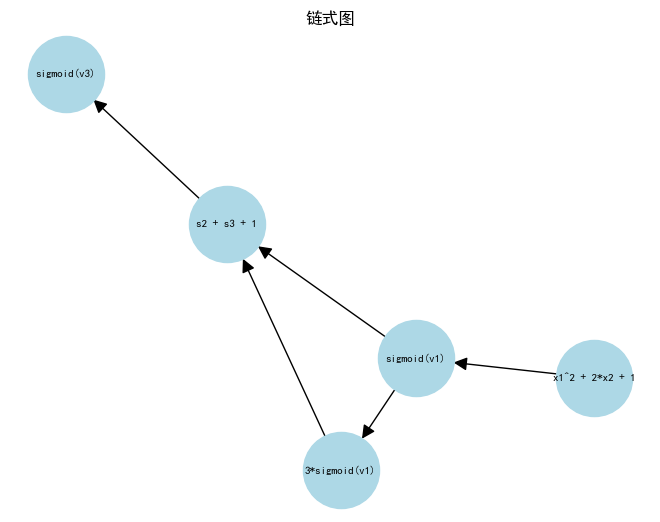

In [12]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=8, font_weight="bold", arrowsize=20)
plt.title("链式图")
plt.show()